In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data1= {
    "Distance(km)": [0,300,1800, 3600 , 3500 ,4800],
    "Age(Ma)": [.25,2,20,28,42,60]
}



In [3]:
df1 = pd.DataFrame(data1)
df1.head()


,Distance(km),Age(Ma)
0,0,0.25
1,300,2.00
2,1800,20.00
3,3600,28.00
4,3500,42.00


In [4]:
x = df1["Distance(km)"]
y= df1["Age(Ma)"]

Sloper Formula that's gonna be use-

# $m = \frac{ \sum(x_i - \bar x )(y_i - \bar y ) }{\sum(x_i-\bar x )^2}$

# $c=\bar y - m \bar x$

In [5]:
# 1D slope evaluator

def findSlope(x,y):

    n = len(x)
    sum_x=0
    sum_y = 0
    X = 0
    Y=0

    for i in range(n):
        sum_x += x[i]
        

    for i in range(n):
        sum_y +=  y[i]

    mean_x= sum(x)/n
    mean_y = sum(y)/n

    for i in range(n):
        Y += (x[i] - mean_x) * (y[i] - mean_y)
        X += (x[i]- mean_x) ** 2

    m = Y/X
    c = mean_y - m * mean_x
       

    return m,c


In [6]:
m,c = findSlope(x,y)

In [7]:
import matplotlib.pyplot as plt

In [8]:
y_pred = [m * xi + c for xi in x]

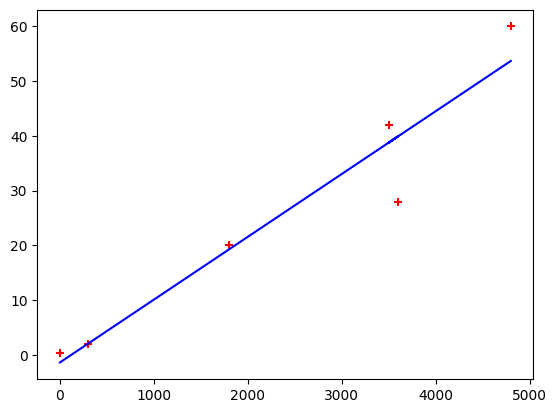

In [9]:
plt.scatter(x,y,marker="+",color='red')
plt.plot(x,y_pred , color="blue")

# Just Use Numpy

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(df1[["Distance(km)"]],y)

LinearRegression()

In [12]:
model.predict(pd.DataFrame({"Distance(km)" : [24]}))

array([-1.13919105])

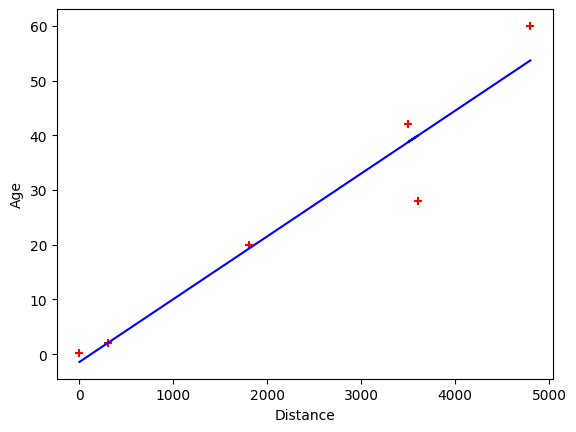

In [13]:
plt.scatter(x, y , color="red" , marker="+")
plt.xlabel("Distance")
plt.ylabel("Age")
plt.plot(df1["Distance(km)"] , model.predict(df1[["Distance(km)"]]) , color="blue")